In [1]:
#Importing all the packages that I will be needing

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

import distutils
from distutils import dir_util
from distutils import util

import tensorflow as tf
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.preprocessing import Normalizer 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Changing some default formating

pd.options.display.float_format = '{:.2f}'.format
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

In [3]:
#Importing data that I will be working on

df = pd.read_csv('listings.csv')

In [4]:
# Getting some idea about the dataset

df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,nan,nan,https://a0.muscache.com/im/pictures/10272854/8...,nan,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,nan,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,nan,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.37,4.94,f,Apartment,Private room,2,1.50,1.00,2.00,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",nan,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.00,15.00,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.00,10.00,10.00,10.00,10.00,10.00,10.00,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,nan,nan,https://a0.muscache.com/im/pictures/69979664/3...,nan,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,nan,f,https://a0

In [5]:
# Getting some statistics about the variables and observations

df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,20677.00,20677.00,0.00,0.00,0.00,20677.00,0.00,20665.00,20665.00,0.00,20677.00,20677.00,20677.00,20671.00,20669.00,20669.00,386.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,20677.00,17861.00,17850.00,17852.00,17840.00,17847.00,17842.00,17842.00,20677.00,20677.00,20677.00,20677.00,18084.00
mean,17910134.36,20190808195514.80,nan,nan,nan,56669811.98,nan,7.01,7.01,nan,52.37,4.89,2.88,1.16,1.45,1.83,548.44,1.46,3.55,617.66,3.52,3.84,602.89,611.19,3.65,606.78,3.78,7.69,12.42,54.10,23.29,7.00,94.98,9.69,9.47,9.74,9.79,9.48,9.18,4.93,4.49,0.41,0.02,0.99
std,10419865.67,7.80,nan,nan,nan,68129016.28,nan,37.73,37.73,nan,0.02,0.04,1.31,0.38,0.89,1.41,555.66,0.94,18.69,537.98,18.69,18.87,538.92,537.84,18.76,536.70,7.22,14.49,22.94,99.49,48.62,14.24,6.63,0.69,0.87,0.65,0.61,0.71,0.81,22.88,22.71,1.08,0.24,1.35
min,2818.00,20190808195507.00,nan,nan,nan,3159.00,nan,0.00,0.00,nan,52.29,4.75,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.01
25%,9340207.00,20190808195507.00,nan,nan,nan,8795077.00,nan,1.00,1.00,nan,52.36,4.86,2.00,1.00,1.00,1.00,0.00,1.00,2.00,21.00,2.00,2.00,20.00,21.00,2.00,21.00,0.00,0.00,0.00,0.00,2.00,0.00,93.00,10.00,9.00,10.00,10.00,9.00,9.00,1.00,1.00,0.00,0.00,0.24
50%,17744272.00,20190808195507.00,nan,nan,nan,26189419.00,nan,1.00,1.00,nan,52.36,4.89,2.00,1.00,1.00,1.00,484.00,1.00,2.00,1125.00,2.00,3.00,1124.00,1124.00,2.30,1124.00,0.00,0.00,0.00,1.00,9.00,2.00,97.00,10.00,10.00,10.00,10.00,10.00,9.00,1.00,1.00,0.00,0.00,0.54
75%,26019741.00,20190808195507.00,nan,nan,nan,77540373.00,nan,2.00,2.00,nan,52.38,4.91,4.00,1.00,2.00,2.00,861.00,2.00,3.00,1125.00,3.00,4.00,1125.00,1125.00,3.00,1125.00,4.00,8.00,13.00,50.00,23.00,7.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,1.00,1.00,1.00,0.00,1.07
max,37590988.00,20190808195507.00,nan,nan,nan,283942179.00,nan,980.00,980.00,nan,52.42,5.03,30.00,15.00,12.00,32.00,3229.00,16.00,1001.00,1825.00,1001.00,1001.00,1825.00,1825.00,1001.00,1825.00,30.00,60.00,90.00,365.00,767.00,161.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,208.00,206.00,15.00,8.00,33.67


In [6]:
# Finding the number of columns and rows

df.shape

(20677, 106)

In [7]:
# Looking into all the variables and their data type

data = pd.DataFrame(columns=['Column_Name', 'Data_Type'])
data_col = []
data_type = []

for i in df.columns:
        
    data_col.append(i)
    data_type.append(df[i].dtypes)
    
data['Column_Name']= data_col
data['Data_Type']= data_type
    
data

,Column_Name,Data_Type
0,id,int64
1,listing_url,object
2,scrape_id,int64
3,last_scraped,object
4,name,object
5,summary,object
6,space,object
7,description,object
8,experiences_offered,object
9,neighborhood_overview,object


## Data Cleaning and Preprocessing

### I will do following things:

#### > Drop all the unnecessary variables
#### > Find out the missing values
#### > Change the data type for some variables as they are with wrong data type
#### > Drop variables if they have more than 80% missing value
#### > Drop observations if they have less than 5% of total data
#### > Do some feature engineering to fillup some of the missing values

In [8]:
# Drop all the unnecessary variables

df_2nd = df.drop(['id','listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered'
                  ,'neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url',
                  'medium_url','picture_url','xl_picture_url','host_id','host_url','host_about','host_response_rate',
                  'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood','host_response_time',
                  'host_verifications','street','neighbourhood_group_cleansed','city','state','zipcode','market',
                  'smart_location','country_code','country','square_feet','weekly_price','monthly_price','security_deposit',
                  'cleaning_fee','guests_included','extra_people','calendar_last_scraped','requires_license','license',
                  'jurisdiction_names','calculated_host_listings_count','latitude','longitude','first_review','last_review']
                 , axis=1)

In [9]:
# Created a function that will tell us the percentage of data missing

def findMissingValue(df):
    data = pd.DataFrame(columns=['Columns','Number_Of_MValue','Percentage_Of_MValue'])
    
    data_col = []
    data_mValue = []
    data_perMValu = []
    
    for fn in df.columns:
        targetNum = len(df)
        x= df[fn].describe()[0]
        if x !=targetNum:
            missingValue = targetNum-x
            percentOfMV = round(float((missingValue/targetNum)*100),2)
            percentOfMV= str(percentOfMV) + ' '+ '%'
            
            data_col.append(fn)
            data_mValue.append(missingValue)
            data_perMValu.append(percentOfMV)
    
    data['Columns']=data_col
    data['Number_Of_MValue']=data_mValue
    data['Percentage_Of_MValue']=data_perMValu
    
    return data.sort_values('Number_Of_MValue',ascending=False).reset_index(drop=True)

In [10]:
findMissingValue(df_2nd)

,Columns,Number_Of_MValue,Percentage_Of_MValue
0,review_scores_checkin,2837.00,13.72 %
1,review_scores_value,2835.00,13.71 %
2,review_scores_location,2835.00,13.71 %
3,review_scores_communication,2830.00,13.69 %
4,review_scores_accuracy,2827.00,13.67 %
5,review_scores_cleanliness,2825.00,13.66 %
6,review_scores_rating,2816.00,13.62 %
7,reviews_per_month,2593.00,12.54 %
8,neighbourhood,831.00,4.02 %
9,host_location,49.00,0.24 %


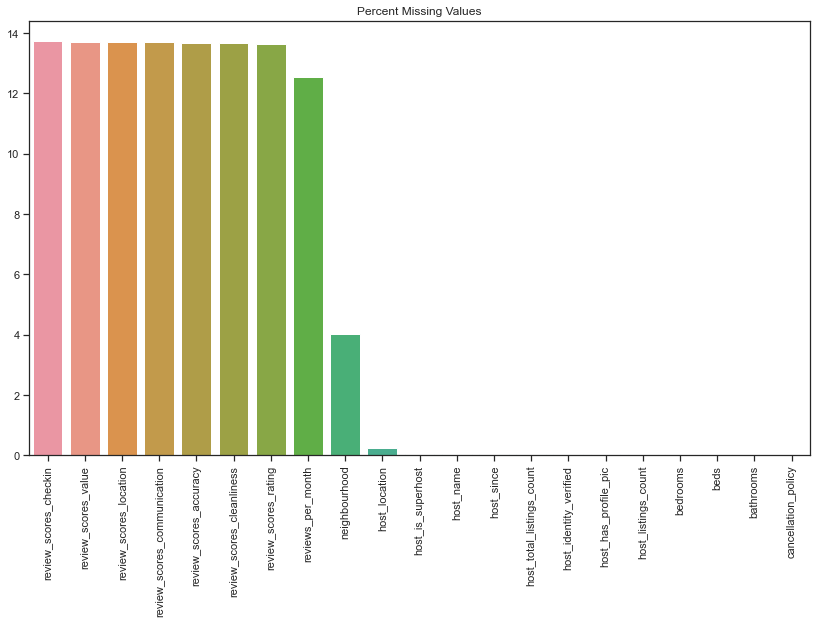

In [11]:
# Following graph is the visual representation of the percentage of data missing

percent = ((df_2nd.isnull().sum()/df.isnull().count()) * 100).sort_values(ascending=False)
percent = percent[percent>0]

plt.figure(figsize=(14,8))
plt.xticks(rotation=90); plt.title('Percent Missing Values')
sns.barplot(x=percent.index, y=percent)

In [12]:
# Removing all the columns that has more than 80% missing value since keeping that variable or assuming large number of 
# missing value will make the result insignificant.

for i in df_2nd.columns:
    col_value = df_2nd[i].describe()[0]
    m_value = len(df_2nd) - col_value
    percntg_mvalue = m_value/len(df)
    if percntg_mvalue >= .8:
        df_2nd.drop(columns=i,inplace=True)

In [13]:
# Removing all the columns that contains only one value in it since these are the columns that won't have any impact in 
# our analysis.

for i in df_2nd.columns:
    if df_2nd[i].describe()[1]==1:
        df_2nd.drop(columns=i,inplace=True)

In [14]:
# Removing data that contains less than 4% of missing value as we can drop 5% of observation if there is any missing value.

for i in df_2nd.columns:
    col_value = df_2nd[i].describe()[0]
    m_value = len(df_2nd) - col_value
    
    if m_value> 0.00:
        percntg_mvalue = m_value/len(df)
        if percntg_mvalue <= .05:
            #print(i+'  - '+ str(m_value))
            
            df_2nd.dropna(axis=0,subset=[i],inplace=True)

In [15]:
# Changing data type. These are containing dates but the data type is 'object', so changing it to date.

col = ['host_since']

for i in col:
    df_2nd[i] = pd.to_datetime(df_2nd[i])

In [16]:
# These columns should be float but they are object, so changing them to float.

col = ['price']

for i in col:
    df_2nd[i]= df_2nd[i].str.replace('$','')
    df_2nd[i]= df_2nd[i].str.replace('%','')
    df_2nd[i] = df_2nd[i].apply(pd.to_numeric, errors='coerce')

In [17]:
findMissingValue(df_2nd)

,Columns,Number_Of_MValue,Percentage_Of_MValue
0,review_scores_checkin,2677.00,13.53 %
1,review_scores_location,2675.00,13.52 %
2,review_scores_value,2675.00,13.52 %
3,review_scores_communication,2671.00,13.5 %
4,review_scores_accuracy,2669.00,13.49 %
5,review_scores_cleanliness,2667.00,13.48 %
6,review_scores_rating,2659.00,13.44 %
7,reviews_per_month,2443.00,12.35 %
8,price,43.00,0.22 %


In [18]:
# Removing data that contains less than 4% of missing value as we can drop 5% of observation if there is any missing value.

for i in df_2nd.columns:
    col_value = df_2nd[i].describe()[0]
    m_value = len(df_2nd) - col_value
    
    if m_value> 0.00:
        percntg_mvalue = m_value/len(df_2nd)
        if percntg_mvalue <= .05:
            #print(i+'  - '+ str(m_value))
            
            df_2nd.dropna(axis=0,subset=[i],inplace=True)

In [19]:
# Checking if there is any missing value.

findMissingValue(df_2nd)

,Columns,Number_Of_MValue,Percentage_Of_MValue
0,review_scores_checkin,2661.00,13.48 %
1,review_scores_location,2659.00,13.47 %
2,review_scores_value,2659.00,13.47 %
3,review_scores_communication,2655.00,13.45 %
4,review_scores_accuracy,2653.00,13.44 %
5,review_scores_cleanliness,2651.00,13.43 %
6,review_scores_rating,2643.00,13.39 %
7,reviews_per_month,2427.00,12.29 %


In [20]:
# Finding out if all the columns that have missing values in it are float/int or object data type.

m_value = findMissingValue(df_2nd)

col = m_value['Columns']

data = pd.DataFrame(columns=['Column_Name', 'Data_Type'])
data_col = []
data_type = []

for i in col:
        
    data_col.append(i)
    data_type.append(df_2nd.select_dtypes(include=['float', 'int']).dtypes[1])
    
data['Column_Name']= data_col
data['Data_Type']= data_type
    
data

,Column_Name,Data_Type
0,review_scores_checkin,float64
1,review_scores_location,float64
2,review_scores_value,float64
3,review_scores_communication,float64
4,review_scores_accuracy,float64
5,review_scores_cleanliness,float64
6,review_scores_rating,float64
7,reviews_per_month,float64


In [21]:
# Since all all the columns that have missing values in it are float data type. I am going to fill them with 0.00.

df_2nd.fillna(value=0.00,inplace=True)

In [22]:
# Checking again if there is any missing value still.

findMissingValue(df_2nd)

,Columns,Number_Of_MValue,Percentage_Of_MValue


In [23]:
# Changing value from 'f' and 't' to boolean

col = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']

for i in col:
    df_2nd[i]= df_2nd[i].apply(lambda x: bool(distutils.util.strtobool(x)))

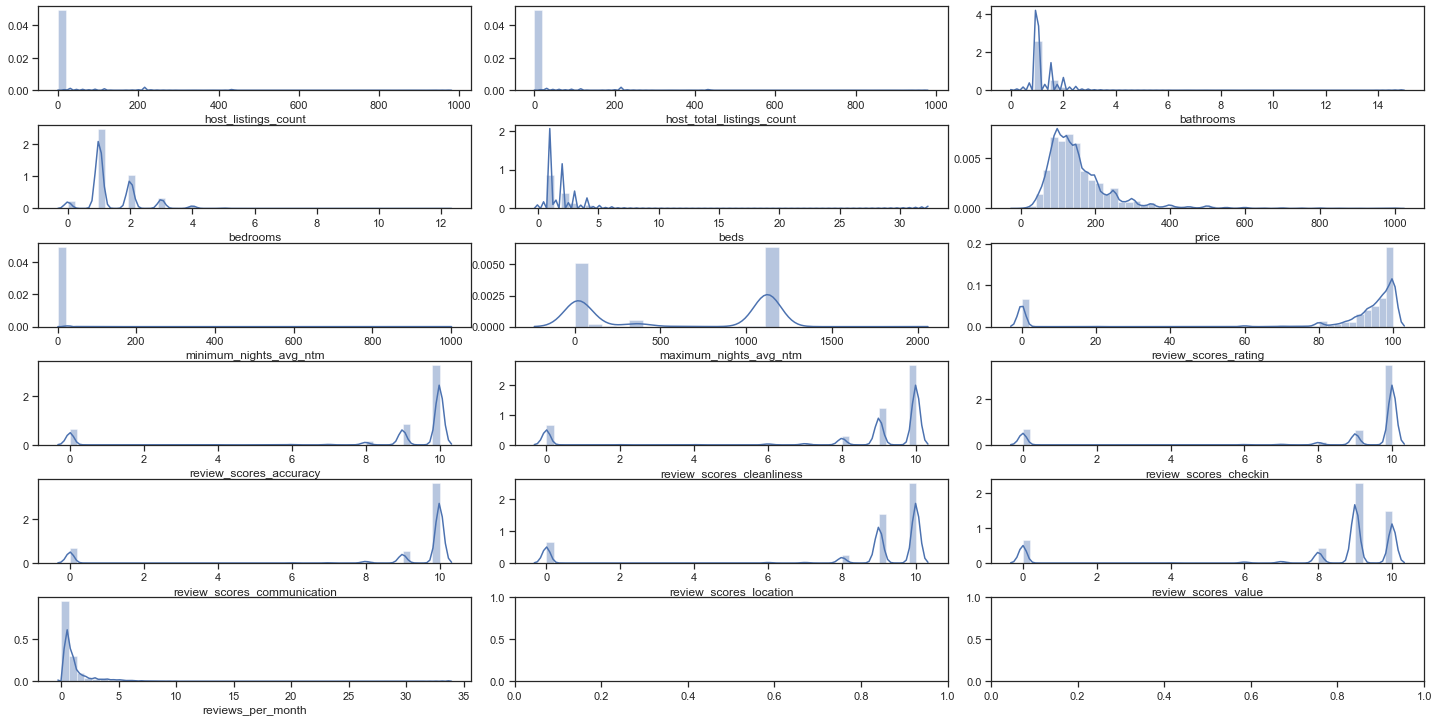

In [24]:
# Detecting outlier through distplot.

num_col = len(df_2nd.select_dtypes(include=['float', 'int']).columns)

g_col= 3

if num_col % 3.0==0:
    g_row = int(num_col/3.0)
    
else:
    g_row = int(round(num_col/3)+1)

fig, axes = plt.subplots(g_row,g_col,figsize=(20,10))

plt.tight_layout()

axes = axes.flatten()

count = 0
for col in df_2nd.select_dtypes(include=['float', 'int']).columns:
    sns.distplot(df_2nd[col], ax=axes[count])
    count=count+1
    
plt.show()

In [25]:
# Detecting outlier through describe() method.

df_2nd.select_dtypes(include=['float', 'int']).describe()

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00,19742.00
mean,7.21,7.21,1.15,1.44,1.80,155.78,3.59,609.90,82.27,8.39,8.20,8.42,8.47,8.21,7.94,0.86
std,38.42,38.42,0.37,0.87,1.36,94.66,17.61,536.11,32.93,3.37,3.33,3.38,3.39,3.30,3.22,1.29
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,1.00,1.00,99.00,2.00,21.00,90.00,9.00,9.00,9.00,9.00,9.00,9.00,0.14
50%,1.00,1.00,1.00,1.00,1.00,130.00,2.30,1124.00,96.00,10.00,10.00,10.00,10.00,10.00,9.00,0.43
75%,2.00,2.00,1.00,2.00,2.00,180.00,3.00,1125.00,99.00,10.00,10.00,10.00,10.00,10.00,10.00,0.99
max,980.00,980.00,15.00,12.00,32.00,999.00,1001.00,1825.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,33.67


In [26]:
# Looking into all the variables that are float or int data type

data = pd.DataFrame(columns=['Column_Name', 'Data_Type'])
data_col = []
data_type = []

for i in df_2nd.select_dtypes(include=['float', 'int']).columns:
        
    data_col.append(i)
    data_type.append(df_2nd.select_dtypes(include=['float', 'int']).dtypes[1])
    
data['Column_Name']= data_col
data['Data_Type']= data_type
    
data

,Column_Name,Data_Type
0,host_listings_count,float64
1,host_total_listings_count,float64
2,bathrooms,float64
3,bedrooms,float64
4,beds,float64
5,price,float64
6,minimum_nights_avg_ntm,float64
7,maximum_nights_avg_ntm,float64
8,review_scores_rating,float64
9,review_scores_accuracy,float64


In [27]:
# Removing outlier by droping top 1% quantile who are right skewed

col_right=['host_listings_count','host_total_listings_count','price','minimum_nights_avg_ntm','reviews_per_month']

for col in col_right:
    q = df_2nd[col].quantile(.99)
    df_2nd = df_2nd[df_2nd[col]<q]
    #test[col].describe(include='all')

In [28]:
# Removing outlier by droping bottom 1% quantile who are left skewed

col_left = ['review_scores_rating','review_scores_cleanliness','review_scores_location','review_scores_value']

for col in col_left:
    q = df_2nd[col].quantile(.01)
    df_2nd = df_2nd[df_2nd[col]>q]
    #test[col].describe(include='all')

In [29]:
# Checking again if the outlier still exists in the dataset through describe() method.

df_2nd.select_dtypes(include=['float', 'int']).describe()

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00,14853.00
mean,1.89,1.89,1.14,1.41,1.76,148.65,2.78,596.16,95.94,9.77,9.57,9.81,9.86,9.62,9.29,0.96
std,4.48,4.48,0.33,0.83,1.26,71.16,1.58,539.67,4.49,0.50,0.64,0.48,0.42,0.49,0.60,1.14
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,60.00,2.00,7.00,2.00,0.00,9.00,8.00,0.01
25%,1.00,1.00,1.00,1.00,1.00,100.00,2.00,20.00,94.00,10.00,9.00,10.00,10.00,9.00,9.00,0.26
50%,1.00,1.00,1.00,1.00,1.00,130.00,2.20,1122.00,97.00,10.00,10.00,10.00,10.00,10.00,9.00,0.57
75%,1.00,1.00,1.00,2.00,2.00,180.00,3.00,1125.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,1.10
max,62.00,62.00,8.00,12.00,32.00,499.00,19.10,1825.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,6.25


# Exploratory Data Analysis

In [30]:
# Top 10 hosts based on number of listings

df_2nd.groupby('host_name').sum()['host_total_listings_count'].nlargest(n=10).iplot(kind='bar')

In [31]:
# The graph represents the listings based on neighbourhood

df_2nd['neighbourhood'].value_counts().sort_values(ascending=False).iplot(kind='bar')

In [32]:
# Price comparison per bedroom

(df_2nd.groupby('bedrooms').std()['price']/df_2nd.groupby('bedrooms').mean()['price']).nlargest(n=10).iplot(kind='bar')

In [33]:
# Finding the type of rooms that has most frequency

df_2nd['room_type']. value_counts().sort_values(ascending=False).iplot(kind='bar')

In [34]:
# Bottom 10 review ratings scorers

df_2nd.groupby('host_name').mean()['review_scores_rating'].nsmallest(n=10).iplot(kind='bar')

In [35]:
# 10 oldes host

oldest_host= pd.DataFrame(df_2nd.groupby('host_name').min()['host_since'].nsmallest(n=10))
oldest_host.columns=['host_since']
oldest_host.reset_index(inplace=True)

oldest_host

,host_name,host_since
0,Daniel,2008-09-24
1,Ramona,2009-01-04
2,Anouk,2009-02-15
3,Marieke,2009-04-02
4,Tiemen & Gaudi,2009-06-06
5,Jesse,2009-08-26
6,Michelle,2009-10-30
7,Joan,2009-11-20
8,Haiko & Lili,2009-11-27
9,Dre&Kareltje,2009-11-29


In [36]:
# Comparing property type based on the total listings count.

df_2nd.groupby('property_type').sum()['host_total_listings_count'].sort_values(ascending=False).iplot(kind='bar')

In [37]:
# Top 10 property type based on price

(df_2nd.groupby('property_type').std()['price']/df_2nd.groupby('property_type').mean()['price']).nlargest(n=10).iplot(kind='bar')

In [38]:
# Top 10 property type based on price. Based on coveriance, the graph is generated.

(df_2nd.groupby('bed_type').std()['price']/df_2nd.groupby('bed_type').mean()['price']).nlargest(n=10).iplot(kind='bar')

In [39]:
# Average daily price per neighbourhood for two people

df_2nd[df_2nd['accommodates']==2].groupby('neighbourhood')['price'].mean().sort_values(ascending=False).iplot(kind='bar')

# Data preparation for building predictive model

In [40]:
# Copying dataframe df_2nd to df_train

df_train = df_2nd.copy()

In [41]:
# Considering following variables to build my predictive model

df_train = df_train[['price','number_of_reviews','review_scores_rating','review_scores_location','bedrooms','beds',
                     'accommodates','room_type','bed_type','cancellation_policy','host_is_superhost',
                     'minimum_nights', 'maximum_nights','minimum_minimum_nights', 'maximum_minimum_nights',
                     'minimum_maximum_nights', 'maximum_maximum_nights']].copy()

In [42]:
df_train.columns

Index(['price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'bedrooms', 'beds', 'accommodates',
       'room_type', 'bed_type', 'cancellation_policy', 'host_is_superhost',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights'],
      dtype='object')

In [43]:
# Getting dummy variables

df_for_model = pd.get_dummies(df_train,drop_first=True)

In [44]:
# Normalizing the following variables.


col = ['beds','bedrooms','accommodates']

normalize = Normalizer().fit(df_for_model[col])
norm_var = normalize.transform(df_for_model[col])

df_model = pd.DataFrame(norm_var, columns = col, index = df_for_model.index)

df_model_norm = pd.merge(df_model,df_for_model.drop(col,axis=1), right_index=True, left_index=True)

df_model_norm['combine_beds_bedrooms_acommodates'] = df_model_norm['beds'] + df_model_norm['bedrooms']+ df_model_norm['accommodates']

df_model_merged = df_model_norm.drop(['beds','bedrooms','accommodates'],axis=1)

In [45]:
df_model_merged.head(2)

,price,number_of_reviews,review_scores_rating,review_scores_location,host_is_superhost,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,combine_beds_bedrooms_acommodates
0,59.00,267,98.00,10.00,True,3,15,3,3,15,15,1,0,0,0,0,1,0,1,0,0,1.67
1,80.00,283,88.00,10.00,False,1,1000,1,4,1000,1000,1,0,0,0,0,1,0,1,0,0,1.63


In [46]:
df_model_merged.columns

Index(['price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'host_is_superhost', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60',
       'combine_beds_bedrooms_acommodates'],
      dtype='object')

0.021635977957684772
Figure(432x288)
-0.13392592254183042
Figure(432x288)
13.96978229032512
Figure(432x288)
15.360643623099865
Figure(432x288)
-7.520462245153752
Figure(432x288)
-0.5266811425327708
Figure(432x288)
0.1955915616197274
Figure(432x288)
-0.518725920495204
Figure(432x288)
-0.5067609246584591
Figure(432x288)
0.17340201632204652
Figure(432x288)
0.19034147324765288
Figure(432x288)
-7.163956073301648
Figure(432x288)
-486.98359117665535
Figure(432x288)
-5355.447640108205
Figure(432x288)
-649.3114662768347
Figure(432x288)
-216.43715512505207
Figure(432x288)
155.8305430916633
Figure(432x288)
-1.8290913910459419
Figure(432x288)
-1.6844364576466122
Figure(432x288)
-1785.149290417982
Figure(432x288)
-1189.7271596110177
Figure(432x288)
19.1582673472319
Figure(432x288)


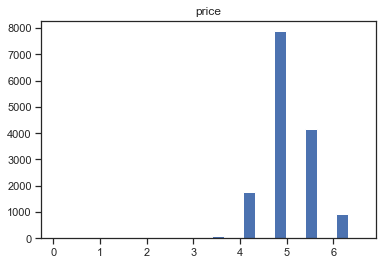

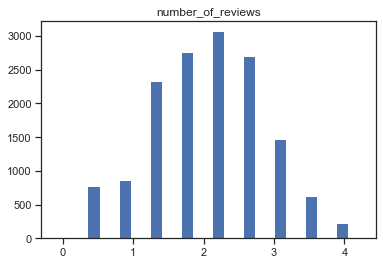

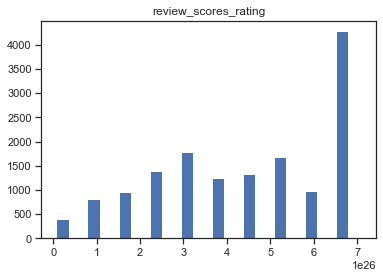

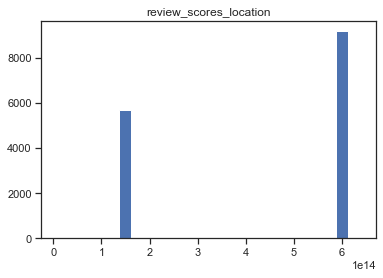

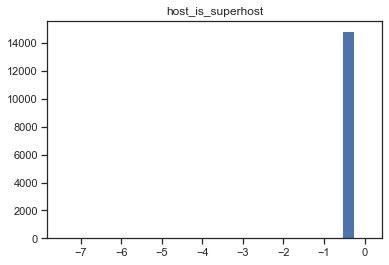

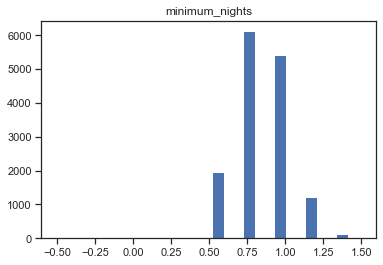

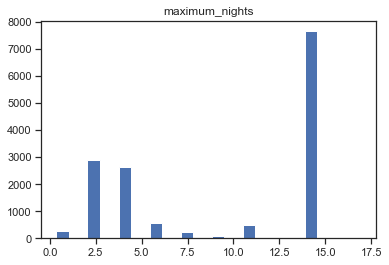

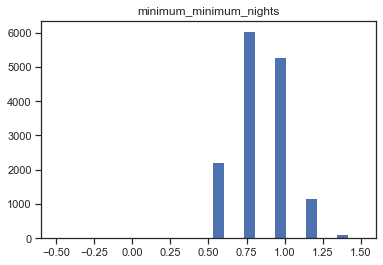

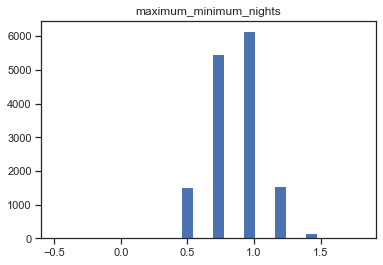

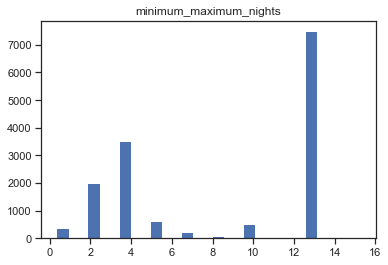

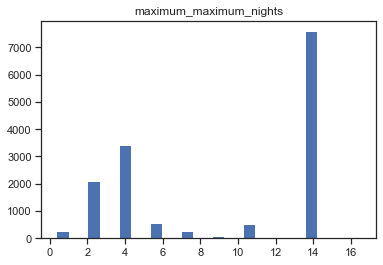

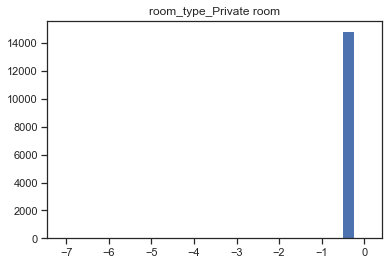

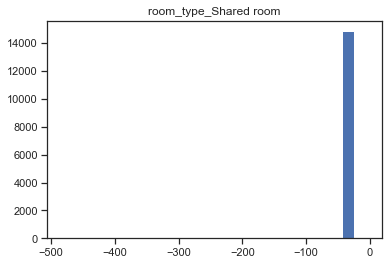

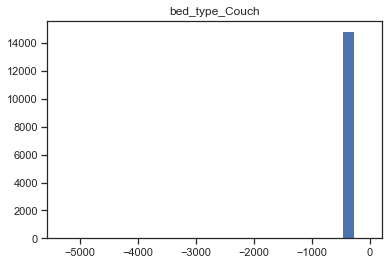

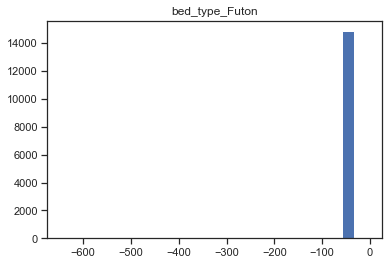

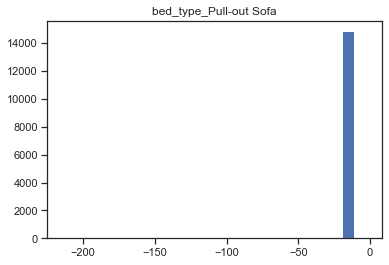

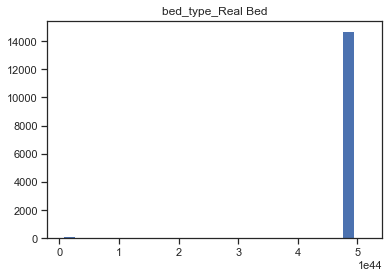

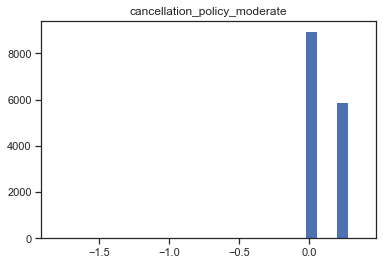

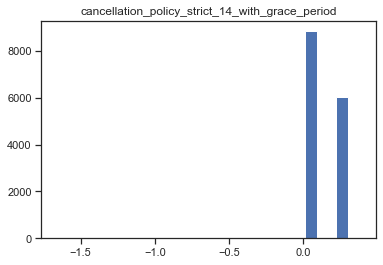

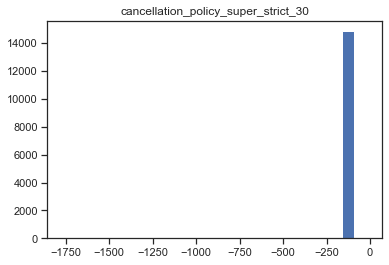

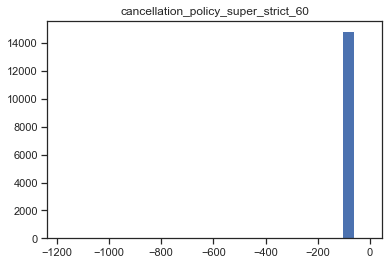

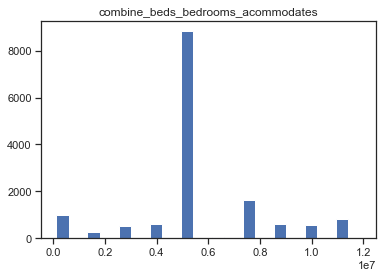

In [47]:
#Boxcox transform and check outputs

# list of variables that need to be transformed to fit a normal distribution

to_check_vars = ['price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'host_is_superhost',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60',
       'combine_beds_bedrooms_acommodates']


# For loop on showing separate histograms per item
i = 0
for x in to_check_vars:
    plt.figure(i)
    plt.title(x)
    
    # power transform
    data = df_model_merged[x] + 1
    data = boxcox(data)
    
    #print the boxcox lambda value
    print(data[1])
    
    #plot the graph
    plt.hist(data)
    print(plt.figure(i))
    
    #increment the counter
    i = i + 1

In [48]:
# variables to keep and boxcox transform 
boxcox_vars = ['price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'host_is_superhost',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60',
       'combine_beds_bedrooms_acommodates']

In [49]:
def create_boxcox_df(df, boxcox_vars):

    #iniate empty list
    lambda_list = list()
    
    #start for loop
    for col in boxcox_vars:
        try:
            # for each var boxcox transform
            data = df[col] +1
            data = boxcox(data)
            
            #lambda list append
            lambda_list.append(data[1])
            
            #create dataframe from array
            df_insert = pd.DataFrame(data[0],columns = [col],index = df_model_merged.index)
            
            #concat dataframes
            df = pd.merge(df_insert,df.drop(col, axis=1), right_index=True, left_index=True)

            
        except:
            continue
    return df, lambda_list

In [50]:
# apply to dataframe
df_model_merged, lambda_list = create_boxcox_df(df_model_merged,boxcox_vars=boxcox_vars)

In [51]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler

# take all the variables that we want to standardize 
scaler_vars = ['number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'host_is_superhost',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60',
       'combine_beds_bedrooms_acommodates']


# initiate standardscaler and apply to data
sc = StandardScaler()
scaled_array = sc.fit_transform(df_model_merged[scaler_vars])

# create new dataframe with scaled variables
df_model_scaled = pd.DataFrame(scaled_array, columns = scaler_vars, index = df_model.index)

# merge them all back together
df_model_merged = pd.merge(df_model_scaled,df_model_merged.drop(scaler_vars,axis=1), right_index=True, left_index=True)

#print(df_model_merged.describe())

In [52]:
# Finding if there is any multicollinearity

df_model_merged.corr().iplot(kind='heatmap')

In [53]:
# Finding which variables have correlation more than .8

corr_matrix = df_model_merged.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

high_corr_var

[('minimum_nights', 'minimum_minimum_nights'),
 ('minimum_nights', 'maximum_minimum_nights'),
 ('maximum_nights', 'minimum_maximum_nights'),
 ('maximum_nights', 'maximum_maximum_nights'),
 ('minimum_minimum_nights', 'maximum_minimum_nights'),
 ('minimum_maximum_nights', 'maximum_maximum_nights'),
 ('bed_type_Pull-out Sofa', 'bed_type_Real Bed')]

In [54]:
# I am going to remove one variables from each pair

df_model_merged.drop(columns=['bed_type_Pull-out Sofa','minimum_nights','maximum_nights','minimum_minimum_nights',
                             'minimum_maximum_nights'],inplace=True)

# Building predictive model

In [55]:
X= df_model_merged.drop(['price'],axis=1)
y= df_model_merged['price']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

# Model initiating
lm = LinearRegression(normalize=True)


# Train the model.
lm.fit(X_train, y_train)

#Predict using your model
y_test_preds = lm.predict(X_test)
y_train_preds = lm.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

print('\n')

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_preds)))

The rsquared on the training data was 0.23143975810757156.  The rsquared on the test data was 0.2004518817326385.


Root Mean Squared Error: 0.43039313551740027


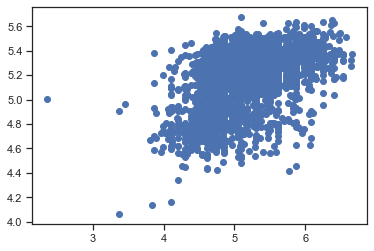

In [58]:
# Visualizing the comparison between actual and prediction

plt.scatter(y_test,y_test_preds)

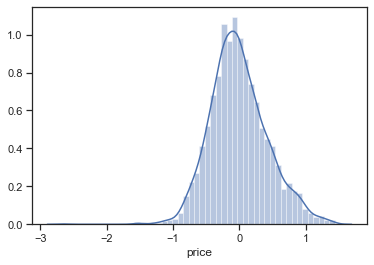

In [61]:
# Distribution of the residules

sns.distplot((y_test-y_test_preds))

In [60]:
df_coef = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])
df_coef

,Coeff
number_of_reviews,0.01
review_scores_rating,0.01
review_scores_location,0.09
host_is_superhost,0.04
maximum_minimum_nights,0.01
maximum_maximum_nights,0.01
room_type_Private room,-0.19
room_type_Shared room,-0.05
bed_type_Couch,-0.00
bed_type_Futon,-0.00
